<a href="https://colab.research.google.com/github/ritikakhandelwal-17/Improvement-in-PEM-Fuel-Cell-Technology-using-Machine-Learning-Techniques/blob/main/Polarization_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
###########import packages##########
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
import tensorflow as tf

from keras import optimizers
from keras import regularizers
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.models import Sequential 
from keras.layers import BatchNormalization
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier 
from keras.wrappers.scikit_learn import KerasRegressor
from keras.constraints import maxnorm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import r2_score , mean_squared_error,  accuracy_score 

In [3]:
#Data Uploading and Cleaning

fdata=pd.read_csv('database.csv',encoding="gbk")
raw_data=fdata.loc[:,[
                      'BET Surface Area cm2/g',
                      'Micropore ratio',
                      'Mesopore ratio',
                      'Macropore ratio',
                      'Membrane Thickness',
                      'I/C Ratio(ionomer/catalyst)',
                      'Anodic Platinum Loading Amount mgPt cm-2',
                      'Anodic catalyst type x wt% Pt/C',
                      'Hot Press Temperature ℃',
                      'Hot Press Time min',
                      'Hot Press Pressure Mpa',
                      'Humidity %',
                      'Operating Temperature ℃',
                      'Flowing rate of H2 ml min-1 ',
                      'Flowing rate of O2 ml min-1 ',
                      'Back Pressure Mpa',
                      'Cathodic Loading Amount mg cm-2',
                      'Co Cotent wt/%',
                      'Fe Cotent wt/%(ICP for metal)',
                      'N Content at/%',
                      'O Content at/%',
                      'S Content at/%',
                      'Pyridinic N+metal N Content ratio at/%',
                      'Pyrrolic N Content ratio at/%',
                      'Graphitic N Content ratio at/%',
                      'Oxidized N Content ratio at/%',
                      #26features (Physical Conditions)
                      'Open Circuit Voltage V',
                      'Voltage 100mA cm0',
                      'Voltage 200mA cm0',
                      'Voltage 300mA cm0',
                      'Voltage 400mA cm0',
                      'Voltage 500mA cm0',
                      'Voltage 600mA cm0',
                      'Voltage 700mA cm0',
                      'Voltage 800mA cm0',
                      'Voltage 900mA cm0',
                      'Voltage 1000mA cm0',
                      'Voltage 1100mA cm0',
                      'Voltage 1200mA cm0',
                      'Voltage 1300mA cm0',
                      'Voltage 1400mA cm0',
                      'Voltage 1500mA cm0',
                      'Voltage 1600mA cm0',
                      'Voltage 1700mA cm0',
                      'Voltage 1800mA cm0',
                      'Voltage 1900mA cm0',
                      'Voltage 2000mA cm0',
                      'Voltage 2100mA cm0',
                      'Voltage 2200mA cm0',
                      'Voltage 2300mA cm0',
                      'Voltage 2400mA cm0',
                      'Voltage 2500mA cm0',
                      'Voltage 2600mA cm0',
                      'Voltage 2700mA cm0',
                      'Voltage 2800mA cm0']]

#handling missing values
median_raw_data=raw_data.median()
dict_median_raw_data=median_raw_data.to_dict()
#Replacing missing values by median
data=raw_data.fillna(dict_median_raw_data)
#Data standardization
raw_power=data.iloc[:,26:]
standardized_data = (data-np.mean(data,axis=0))/np.std(data,axis=0)
param=standardized_data.iloc[:,0:26]
power=standardized_data.iloc[:,26:]
#Randomly pick 4 curves to drop out from the database as testset
param=param.drop(index=[13,19,33,62])
power=power.drop(index=[13,19,33,62])
X=param.values.astype(np.float32)
y=power.values.astype(np.float32)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


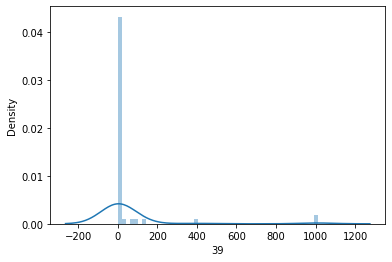

In [10]:
#Skewed Graph
fig = plt.figure()
ax = fig.add_subplot(111)
sns.distplot(data.loc[39])

In [5]:
#Search neuron network hyperparmeter space (Hyperparameter Tuning)
dropout_list= np.arange(0, 1, 0.2)
for neurons in range(100,2000,100):
    for activation in ['relu','tanh','sigmoid','softsign','hard_sigmoid']:
        for regularizer_term in [0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]:
            for dropout in dropout_list:
                for epochs_number in range(250,2000,250):
                    for batch_size_number in range (20,200,20):
                        for learning_rate_search in [0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]:
                            ###########implementing hyperparameters##########
                            neurons1=neurons
                            activation1=activation
                            regularizer=keras.regularizers.l2(regularizer_term)
                            dropout_rate=dropout
                            ###########keras ANN model construction##########
                            model = Sequential() 
                            model.add(Dense(neurons1, input_dim=26, kernel_initializer='random_normal',
                                            bias_initializer='random_normal',activation=activation1,kernel_regularizer=regularizer)) 
                            model.add(Dropout(dropout_rate))
                            model.add(Dense(neurons1, input_dim=neurons1, kernel_initializer='random_normal',
                                        bias_initializer='random_normal',activation=activation1,kernel_regularizer=regularizer)) 
                            model.add(Dropout(dropout_rate))
                            model.add(Dense(neurons1, input_dim=neurons1, kernel_initializer='random_normal',
                                        bias_initializer='random_normal',activation=activation1,kernel_regularizer=regularizer)) 
                            model.add(Dropout(dropout_rate))
                            model.add(Dense(neurons1, input_dim=neurons1, kernel_initializer='random_normal',
                                        bias_initializer='random_normal',activation=activation1,kernel_regularizer=regularizer)) 
                            model.add(Dropout(dropout_rate))
                            model.add(Dense(neurons1, input_dim=neurons1, kernel_initializer='random_normal',
                                        bias_initializer='random_normal',activation=activation1,kernel_regularizer=regularizer)) 
                            model.add(Dropout(dropout_rate))
                            model.add(Dense(29, input_dim=neurons1, activation='linear'))
                            adam=tf.optimizers.Adam(lr=learning_rate_search)
                            model.compile(loss='mse', optimizer=adam) 
                            print('Training ------------')
                            #train the model with the training set
                            #testset has been removed from X and y before
                            model.fit(X, y, epochs=epochs_number, batch_size=batch_size_number,
                                      validation_split=0.15,verbose=0)
                            #Testing 62th index
                            standardized_user_input1=standardized_data.iloc[:,0:26].loc[62]
                            #consult the ANN with standardized input
                            data_test_input1=standardized_user_input1
                            data_test_input1=pd.DataFrame(data_test_input1)
                            data_test_input1=data_test_input1.T
                            data_test_param1=data_test_input1.values.astype(np.float32)

                            #Get the prediction
                            predict_ann1= model.predict(data_test_param1)
                            
                            #transfer the prediction to voltage values
                            voltage_result_list1=np.std(raw_power,axis=0).T.values*predict_ann1+np.mean(raw_power,axis=0).T.values
                                                       
                            #computing R Score
                            real_current_series1=pd.Series(data.iloc[62,26:].values)
                            voltage_result_series1=pd.Series(voltage_result_list1[0,:])
                            corr_ann1= round(voltage_result_series1.corr(real_current_series1), 6)
                           
                            #Testing 33rd index
                            standardized_user_input2=standardized_data.iloc[:,0:26].loc[33]
                            #consult the ANN with standardized input
                            data_test_input2=standardized_user_input2
                            data_test_input2=pd.DataFrame(data_test_input2)
                            data_test_input2=data_test_input2.T
                            data_test_param2=data_test_input2.values.astype(np.float32)
                            #get the prediction
                            predict_ann2= model.predict(data_test_param2)
                            #transfer the prediction to voltage values
                            voltage_result_list2=np.std(raw_power,axis=0).T.values*predict_ann2+np.mean(raw_power,axis=0).T.values
                            
                            #computing R Score
                            real_current_series2=pd.Series(data.iloc[33,26:46].values)
                            voltage_result_series2=pd.Series(voltage_result_list2[0,0:20])
                            corr_ann2 = round(voltage_result_series2.corr(real_current_series2), 6)
                           
                            #Testing 13th index
                            standardized_user_input3=standardized_data.iloc[:,0:26].loc[13]
                            #consult the ANN with standardized input
                            data_test_input3=standardized_user_input3
                            data_test_input3=pd.DataFrame(data_test_input3)
                            data_test_input3=data_test_input3.T
                            data_test_param3=data_test_input3.values.astype(np.float32)
                            #get the prediction
                            predict_ann3= model.predict(data_test_param3)
                            #transfer the prediction to voltage values
                            voltage_result_list3=np.std(raw_power,axis=0).T.values*predict_ann3+np.mean(raw_power,axis=0).T.values
                            
                            #computing R Score
                            real_current_series3=pd.Series(data.iloc[13,26:41].values)
                            voltage_result_series3=pd.Series(voltage_result_list3[0,0:15])
                            corr_ann3 = round(voltage_result_series3.corr(real_current_series3), 6)

                            #Testing for 19th index
                            standardized_user_input4=standardized_data.iloc[:,0:26].loc[19]
                            #consult the ANN with standardized input
                            data_test_input4=standardized_user_input4
                            data_test_input4=pd.DataFrame(data_test_input4)
                            data_test_input4=data_test_input4.T
                            data_test_param4=data_test_input4.values.astype(np.float32)
                            #get the prediction
                            predict_ann4= model.predict(data_test_param4)
                            #transfer the prediction to voltage values
                            voltage_result_list4=np.std(raw_power,axis=0).T.values*predict_ann4+np.mean(raw_power,axis=0).T.values
                            
                            #computing R Score
                            real_current_series4=pd.Series(data.iloc[19,26:41].values)
                            voltage_result_series4=pd.Series(voltage_result_list4[0,0:15])
                            corr_ann4 =round(voltage_result_series4.corr(real_current_series4), 6)
                           
                            #judge if all the 4 curves has obtained good simulation effect 
                            if (corr_ann1>=0.99 and corr_ann2>=0.99 and corr_ann3>=0.99 and corr_ann4>=0.99):
                                break
                            else:
                                print('R_1:',corr_ann1,'R_2:',corr_ann2)
                                print('R_3:',corr_ann3,'R_4:',corr_ann4)
                                
                                K.clear_session()
                        else:continue
                        break
                    else:continue
                    break
                else:continue
                break
            else:continue
            break
        else:continue
        break 
    else:continue
    break


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training ------------
R_1: 0.98927 R_2: 0.989427
R_3: 0.991915 R_4: 0.979566
Training ------------
R_1: 0.990242 R_2: 0.990108
R_3: 0.991041 R_4: 0.985081
Training ------------


ANN for index13 0.9974
[[0.96207703 0.79682174 0.73827151 0.69749618 0.65841794 0.62641943
  0.59166514 0.56141382 0.52487969 0.49361167 0.45638665 0.42895812
  0.40031521 0.37093995 0.34321799 0.32077176 0.29321838 0.26612238
  0.24374056 0.22357473 0.20397167 0.18305757 0.16900654 0.15349494
  0.13188989 0.12003452 0.11473812 0.10423574 0.09153138]]
[0.95    0.85    0.8     0.75    0.725   0.7     0.675   0.625   0.58
 0.55    0.53    0.505   0.475   0.45    0.42    0.41    0.39    0.36
 0.33    0.31    0.29    0.27    0.24    0.21    0.17    0.15    0.13086
 0.11328 0.0971 ]
ANN for index19 0.9929
[[0.86183608 0.68776899 0.62906599 0.57986616 0.54307356 0.51132263
  0.4768826  0.45031455 0.43248982 0.40124511 0.3813091  0.34451071
  0.33645495 0.31127058 0.29117508 0.2658683  0.24591629 0.22652815
  0.20696725 0.19540479 0.17968969 0.17223842 0.14981924 0.14347661
  0.1273857  0.12295582 0.10812845 0.11221061 0.09523749]]
[0.95    0.7     0.575   0.53    0.5     0.45    0.425   0.4 

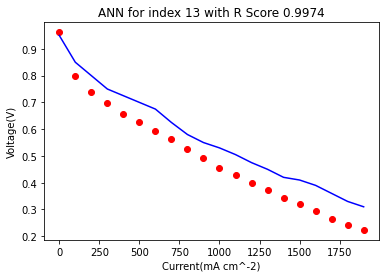

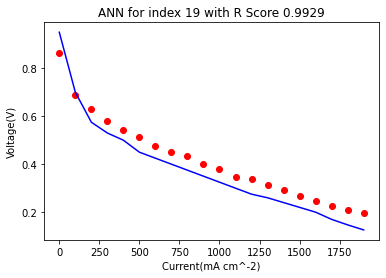

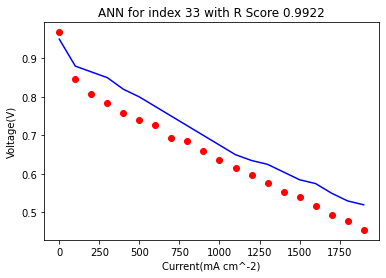

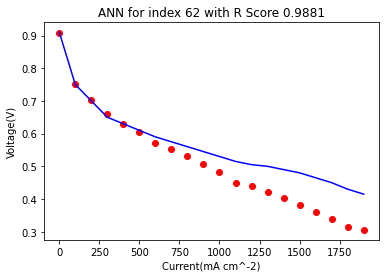

In [6]:
#Polarization curve for test indices

drop_index = [13,19,33,62]
for i in drop_index:
  standardized_user_input=standardized_data.iloc[:,0:26].loc[i]
  #consult the ANN with standardized input
  data_test_input=standardized_user_input
  data_test_input=pd.DataFrame(data_test_input)
  data_test_input=data_test_input.T
  data_test_param=data_test_input.values.astype(np.float32)
  #get the prediction
  predict_ann= model.predict(data_test_param)
  #transfer the prediction to voltage values
  voltage_result_list=np.std(raw_power,axis=0).T.values*predict_ann+np.mean(raw_power,axis=0).T.values
  x_current=np.arange(0,2000,100)
  
  #computing R Score
  real_current_series=pd.Series(data.iloc[i,26:46].values)
  voltage_result_series=pd.Series(voltage_result_list[0,0:20])
  corr_ann = round(voltage_result_series.corr(real_current_series), 4)
  print('ANN for index'+str(i),corr_ann)
  #Visualization
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.scatter(x_current,voltage_result_list[0,0:20],color='red',label='Predicted Voltage')
  ax.plot(x_current,data.iloc[i,26:46].values,color='blue')
  ax.set_xlabel(u"Current(mA cm^-2)")
  ax.set_ylabel(u"Voltage(V)")
  plt.title('ANN for index '+str(i) + ' with R Score ' + str(corr_ann))
  ###########printing results##########
  print(voltage_result_list)
  print(data.iloc[i,26:].values)
